In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [5]:
# Create State

class llm_blog(TypedDict):

    title:str
    outline:str
    content:str



In [6]:
#Create function

def blog_outline(state:llm_blog )->llm_blog:

    title = state['title']

    prompt = f"Generate the blog outline on the provided topic {title}"

    outline = model.invoke(prompt)

    state['outline'] = outline

    return state


In [7]:
def blog_content(state : llm_blog)->llm_blog:

    title = state['title']
    outline = state['outline']

    prompt = f"Generate the blog content on the provided topic{title} based on the outline {outline}"

    content = model.invoke(prompt)

    state['content'] = content

    return state

In [8]:
graph = StateGraph(llm_blog)

graph.add_node('blog_outline', blog_outline)
graph.add_node('blog_content',blog_content)

graph.add_edge(START,'blog_outline')
graph.add_edge('blog_outline','blog_content')
graph.add_edge('blog_content',END)

In [9]:
workflow = graph.compile()

In [11]:
initial_state = {'title': "Impact of AI on jobs"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Impact of AI on jobs', 'outline': AIMessage(content='Here\'s a comprehensive blog outline on the "Impact of AI on Jobs," designed to be engaging, informative, and balanced.\n\n---\n\n## Blog Outline: The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n\n**Target Audience:** Professionals, students, educators, policymakers, anyone interested in the future of work.\n**Tone:** Informative, balanced, forward-looking, slightly urgent but optimistic about adaptation.\n\n---\n\n### **I. Catchy Title Options:**\n\n*   The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n*   AI and the Future of Work: Are You Ready for the Transformation?\n*   Beyond Automation: How AI is Reshaping the Global Job Market\n*   Decoding the AI Effect: Job Losses, New Roles, and Essential Skills\n\n### **II. Introduction (Approx. 150-200 words)**\n\n*   **Hook:** Start with the current buzz around AI (ChatGPT, DALL-E, etc.) and the palpable excitement/anxiety 

AIMessage(content='Here\'s a comprehensive blog outline on the "Impact of AI on Jobs," designed to be engaging, informative, and balanced.\n\n---\n\n## Blog Outline: The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n\n**Target Audience:** Professionals, students, educators, policymakers, anyone interested in the future of work.\n**Tone:** Informative, balanced, forward-looking, slightly urgent but optimistic about adaptation.\n\n---\n\n### **I. Catchy Title Options:**\n\n*   The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n*   AI and the Future of Work: Are You Ready for the Transformation?\n*   Beyond Automation: How AI is Reshaping the Global Job Market\n*   Decoding the AI Effect: Job Losses, New Roles, and Essential Skills\n\n### **II. Introduction (Approx. 150-200 words)**\n\n*   **Hook:** Start with the current buzz around AI (ChatGPT, DALL-E, etc.) and the palpable excitement/anxiety it generates.\n*   **Brief Definition of AI:*

In [14]:
final_state['outline'].content

'Here\'s a comprehensive blog outline on the "Impact of AI on Jobs," designed to be engaging, informative, and balanced.\n\n---\n\n## Blog Outline: The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n\n**Target Audience:** Professionals, students, educators, policymakers, anyone interested in the future of work.\n**Tone:** Informative, balanced, forward-looking, slightly urgent but optimistic about adaptation.\n\n---\n\n### **I. Catchy Title Options:**\n\n*   The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n*   AI and the Future of Work: Are You Ready for the Transformation?\n*   Beyond Automation: How AI is Reshaping the Global Job Market\n*   Decoding the AI Effect: Job Losses, New Roles, and Essential Skills\n\n### **II. Introduction (Approx. 150-200 words)**\n\n*   **Hook:** Start with the current buzz around AI (ChatGPT, DALL-E, etc.) and the palpable excitement/anxiety it generates.\n*   **Brief Definition of AI:** What is AI in th

In [15]:
final_state['content'].content

'Here\'s the blog content based on the comprehensive outline provided:\n\n---\n\n## The AI Revolution: Navigating its Impact on Jobs – Threat or Opportunity?\n\nIn recent months, the world has been captivated by the rapid advancements in Artificial Intelligence. From the conversational prowess of ChatGPT to the artistic wonders of DALL-E, AI is no longer a futuristic concept but a tangible force reshaping our daily lives and, critically, our professional landscapes. At its core, AI in the context of work refers to systems that can automate tasks, learn from data, and make decisions, often exceeding human speed and scale.\n\nThis isn\'t merely another technological upgrade; it\'s a fundamental shift poised to redefine the global job market. AI presents both significant challenges, notably the potential for job displacement, and unprecedented opportunities, including the creation of entirely new roles and enhanced productivity across industries. While some foresee a future of widespread 

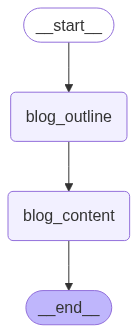

In [17]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())